In [ ]:
## Data analysis tools
import pandas as pd
import numpy as np

In [ ]:
# For Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# For Train-Test Split
from sklearn.model_selection import train_test_split

In [ ]:
# For importing SVM - (Support Vector Machine)
from sklearn.svm import SVC

In [ ]:
# For importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
# For importing KNN
from sklearn.neighbors import KNeighborsClassifier   # Import necessary modules
from sklearn.model_selection import train_test_split
 

In [ ]:
#For Receiver Operating Characteristic (ROC)
from sklearn.metrics import roc_curve ,roc_auc_score, auc


In [ ]:
# For Importing Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,fbeta_score,matthews_corrcoef

In [ ]:
data = pd.read_csv("/content/diabetes.csv")

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Q1.  Preparing 3 models for the dataset

In [ ]:
# 1) SVM model 

In [ ]:
# Creating the SVM model 

In [ ]:
# Splitting the dataset into training and testing sets.
x1 = data.iloc[:, :-2]
y1 = data.iloc[:, -1]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state = 0, test_size = 0.2)

In [ ]:
model = SVC(kernel='rbf')
model.fit(x1_train,y1_train)
y1_pred = model.predict(x1_test)

In [ ]:
y1_train_pred = model.decision_function(x1_train)    
y1_test_pred = model.decision_function(x1_test) 

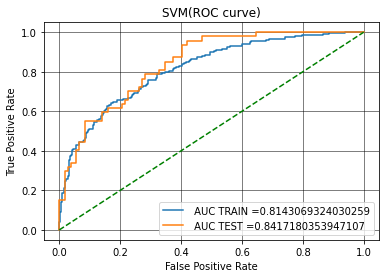

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y1_train, y1_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y1_test, y1_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [ ]:
model.score(x1_test,y1_test)

0.7987012987012987

In [ ]:
# 2) Logistic Regression

In [ ]:
# DOing Some Data Visualisation to predict the dependicies of Dependent and Indepent Variables

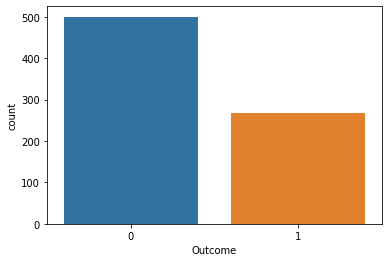

In [ ]:
sns.countplot(x = 'Outcome',data = data)

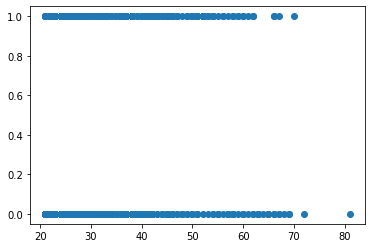

In [ ]:
plt.scatter(data['Age'],data['Outcome'])

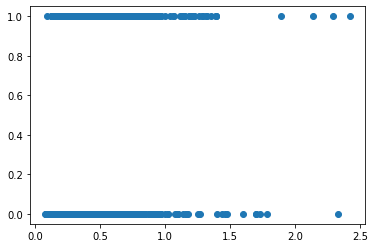

In [ ]:
plt.scatter(x= data['DiabetesPedigreeFunction'],y = data['Outcome'])

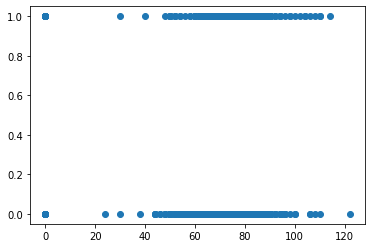

In [ ]:
plt.scatter(x = data['BloodPressure'],y = data['Outcome'])

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

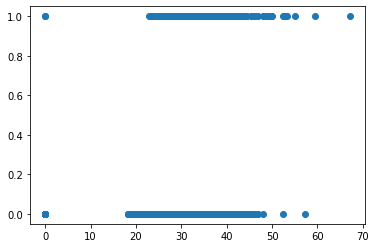

In [ ]:
plt.scatter(x = data['BMI'],y = data['Outcome'])

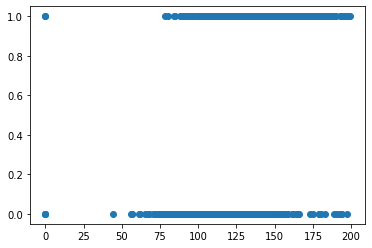

In [ ]:
plt.scatter(x = data['Glucose'],y = data['Outcome'])

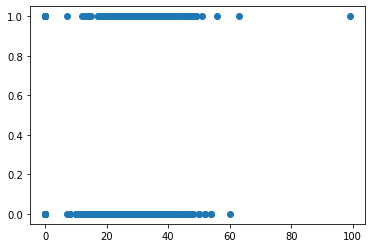

In [ ]:
plt.scatter(x = data['SkinThickness'],y = data['Outcome'])

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
train = data.drop(['Outcome','Age','SkinThickness'],axis = 1)
test = data['Outcome']

In [ ]:
x2_train,x2_test,y2_train,y2_test = train_test_split(train,test,test_size = 0.1,random_state = 4)

In [ ]:
model1 = LogisticRegression()

In [ ]:
model1.fit(x2_train,y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
model1.score(x2_test,y2_test)

0.8181818181818182

In [ ]:
y2_test[y2_test==1].sum() # total 26 people are diabetic in our testing set 

26

In [ ]:
y2_predict = model1.predict(x2_test)

In [ ]:
y2_predict

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
y2_predict[y2_predict==1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
len(y2_predict[y2_predict==1]) # jab hmne predciction kiya toh 23 people are diabetic 

22

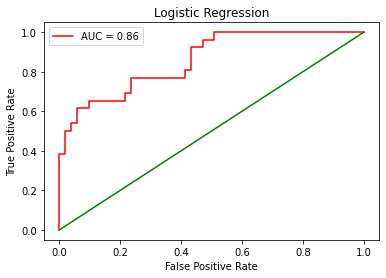

In [ ]:
# Plotting the ROC Curve

prob_lr=model1.predict_proba(x2_test)
auc_lr = roc_auc_score(y2_test,prob_lr[:,1])
fprlr,tprlr,_ = roc_curve(y2_test,prob_lr[:,1])
roc_auc=auc(fprlr,tprlr)
plt.plot(fprlr,tprlr,label = "AUC = %.2f" % auc_lr,color = 'red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.plot([0,1],[0,1],"-",color ='green' )
plt.legend()
plt.show()

In [ ]:
# 3 KNN Model

In [ ]:
# for the purpose of simplicity and analysing the most relevent  data , we will select three features of the dataset
# Glucose , Insulin and BMI
q_cols = ['Glucose','Insulin','BMI','Outcome']
# defining variables and features for the dataset for splitting 
df = data[q_cols]
print(df.head(2))

   Glucose  Insulin   BMI  Outcome
0      148        0  33.6        1
1       85        0  26.6        0


In [ ]:
# let's split the data into training and testing datasets
split = 0.75  # 75% train and 25% test dataset
total_len = len(df)
split_df = int(total_len*split)
train, test = df.iloc[:split_df,0:4],df.iloc[split_df:,0:4] 
train_x4 = train[['Glucose','Insulin','BMI']]
train_y4 = train['Outcome']
test_x4 = test[['Glucose','Insulin','BMI']]
test_y4 = test['Outcome']

In [ ]:
a = len(train_x4) 
b = len(test_x4)
print(' Training data =',a,'\n','Testing data =',b,'\n','Total data length = ',a+b)

 Training data = 576 
 Testing data = 192 
 Total data length =  768


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(train_x4,train_y4)
    
    train_scores.append(knn.score(train_x4,train_y4))
    test_scores.append(knn.score(test_x4,test_y4))

In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 74.47916666666666 % and k = [12]


In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(12)

knn.fit(train_x4,train_y4)
knn.score(test_x4,test_y4)

0.7447916666666666

In [ ]:
from sklearn.metrics import roc_curve
y4_pred_proba = knn.predict_proba(test_x4)[:,1]
fpr, tpr, thresholds = roc_curve(test_y4, y4_pred_proba)

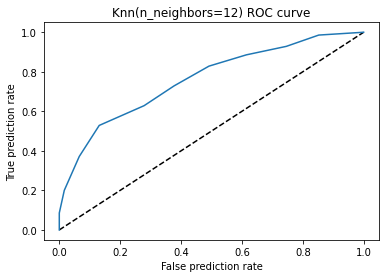

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False prediction rate')
plt.ylabel('True prediction rate')
plt.title('Knn(n_neighbors=12) ROC curve')
plt.show()

In [ ]:
# Q2. Confusion matrix for all the 3 models

In [ ]:
# 1 ) confusion matrics for model = SVM

confusion_matrix(y1_test,y1_pred)

array([[98,  9],
       [22, 25]])

Text(0.5, 15.0, 'Predicted value')

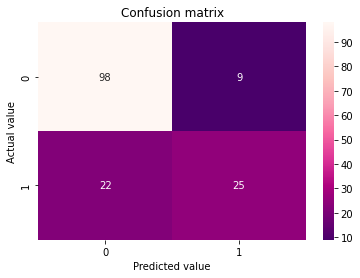

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y1_test, y1_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu_r" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')

In [ ]:
accuracy_score(y1_test,y1_pred)

0.7987012987012987

In [ ]:
precision_score(y1_test,y1_pred)

0.7352941176470589

In [ ]:
recall_score(y1_test,y1_pred)

0.5319148936170213

In [ ]:
f1_score(y1_test,y1_pred)

0.617283950617284

In [ ]:
# 2) confusion matrics for model = Logistic Regression 

In [ ]:
confusion_matrix(y2_test,y2_predict) # here negative is first 

array([[46,  5],
       [ 9, 17]])

Text(0.5, 15.0, 'Predicted value')

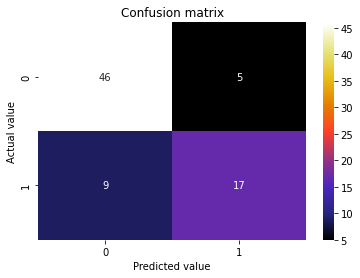

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y2_test, y2_predict)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="CMRmap" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')

In [ ]:
accuracy_score(y2_test,y2_predict)

0.8181818181818182

In [ ]:
precision_score(y2_test,y2_predict)

0.7727272727272727

In [ ]:
recall_score(y2_test,y2_predict)

0.6538461538461539

In [ ]:
f1_score(y2_test,y2_predict)

0.7083333333333333

In [ ]:
# 3 )confusion matrics for model = KNN

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y4_pred = knn.predict(test_x4)
confusion_matrix(test_y4,y4_pred)
pd.crosstab(test_y4, y4_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,106,16,122
1,33,37,70
All,139,53,192


Text(0.5, 15.0, 'Predicted value')

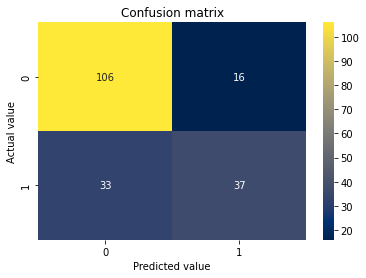

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y4, y4_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="cividis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')

In [ ]:
accuracy_score(test_y4,y4_pred)

0.7447916666666666

In [ ]:
precision_score(test_y4,y4_pred)

0.6981132075471698

In [ ]:
recall_score(test_y4,y4_pred)

0.5285714285714286

In [ ]:
f1_score(test_y4,y4_pred)

0.6016260162601625

**Q4 **

Out of 3 models i.e. 
1) SVM model
2) Logistic Regression
3) KNN 

we concluded that:

  Logistic Regression has highest accuracy and f1 score with 
  Accuracy = 81.8 %
  f1 score = 70.8 %

Logistic regression is applied to predict the categorical dependent variable. In other words, it's used when the prediction is categorical, for example, yes or no, true or false, 0 or 1. The predicted probability or output of logistic regression can be either one of them, and there's no middle ground.


In [ ]:
# Q5 
# EXAMPLES

In [ ]:
# EX 1:

In [ ]:
p = model1.predict([x2_test.iloc[0]])

print(y2_test.iloc[0] == p)

[ True]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# EX 2:

In [ ]:
p = model1.predict([x2_test.iloc[1]])

print(y2_test.iloc[1] == p)

[ True]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# EX 3:

In [ ]:
p = model1.predict([x2_test.iloc[2]])

print(y2_test.iloc[2] == p)

[ True]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
